In [68]:
%load_ext autoreload
%autoreload 1
# %aimport utilsLoaders
# %aimport ocfeats
%aimport utilsShoulder


In [69]:
from pathlib import Path

import pandas as pd # also openpyxl for xlsx files
import numpy as np
import scipy.signal as ss
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.spatial import ConvexHull

from tqdm import tqdm, trange

from utilsLoaders import read_trc, read_mot
from utilsShoulder import fancy_shoulder
import ocfeats

# gdrive = Path('/Volumes/GoogleDrive-112026393729621442608')
gdrive = Path('/Users/psr/Library/CloudStorage/GoogleDrive-paru@stanford.edu')
# datadir = gdrive / 'My Drive/NMBL Lab/OpenCap for NMD biomarkers/data'
# dataset = '2023-05_dhd'

datadir = gdrive / 'Shared drives/OpenCapNMD/Data/'


def get_trc_fpath(sid, trial):
    # return datadir / dataset / f'opencap_data/{sid}/' \
    return datadir / f'opencap_data/{sid}/' \
        f'MarkerData/PostAugmentation/{trial}/{trial}.trc'

def get_mot_fpath(sid, trial):
    # return datadir / dataset / f'opencap_data/{sid}/' \
    return datadir / f'opencap_data/{sid}/' \
        f'OpenSimData/Kinematics/{trial}.mot'
    

In [25]:
# colorblind friendly palette
from cycler import cycler
cp = ["#172A5A", "#FF7171", "#227567", "#34BAEA", "#F9D466", ]
plt.rcParams['axes.prop_cycle'] = cycler(color=cp)

# set default font
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = ['Open Sans', 'Arial']

# automatically despine
plt.rcParams['axes.spines.top'] = False
plt.rcParams['axes.spines.right'] = False

# set defualt DPI
plt.rcParams['figure.dpi'] = 72



In [27]:
# df_session = pd.read_excel(datadir / dataset / 'session_info.xlsx', engine='openpyxl')
# df_trial = pd.read_excel(datadir / dataset / 'trial_info.xlsx', engine='openpyxl')
# df_part = pd.read_excel(datadir / dataset / 'participant_info.xlsx', engine='openpyxl')

df_session = pd.read_excel(datadir / 'session_info.xlsx', engine='openpyxl')
df_trial = pd.read_excel(datadir / 'trial_info.xlsx', engine='openpyxl')
df_part = pd.read_excel(datadir / 'participant_info.xlsx', engine='openpyxl')


p104


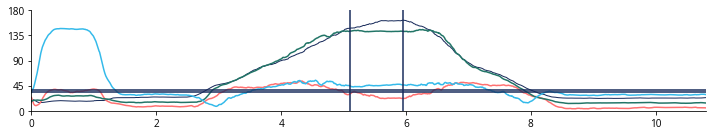

In [58]:
pid = 'p014'
# pid = 'p060'
# pid = 'p093'

df_temp = df_trial[df_trial.trial_clean == 'brooke']
um = df_temp.sample(1).iloc[0]
pid, sid, trial = um[['pid', 'sid', 'trial']]
print(pid)

fps, markers, xyz = read_trc(get_trc_fpath(sid, trial))

rw = xyz[:,np.argmax(markers=='RWrist'),1]
lw = xyz[:,np.argmax(markers=='LWrist'),1]
mean_w = (rw + lw) / 2

rsa, rea, lsa, lea = ocfeats.trc_arm_angles(xyz, markers)

mean_sa = (rsa + lsa) / 2
mean_ea = (rea + lea) / 2

max_rsa = np.max(rsa)
max_lsa = np.max(lsa)

max_mean_sa = np.max(mean_sa)

rea_at_max_rsa = rea[np.argmax(rsa)]
lea_at_max_lsa = lea[np.argmax(lsa)]
mean_ea_at_max_mean_sa = mean_ea[np.argmax(mean_sa)]

rea_at_max_rw = rea[np.argmax(rw)]
lea_at_max_lw = lea[np.argmax(lw)]
mean_ea_at_max_mean_w = mean_ea[np.argmax(mean_w)]

t = np.arange(xyz.shape[0]) / fps
plt.figure(figsize=(10,2))
plt.plot(t, rsa, lw=1)
plt.plot(t, rea)
plt.plot(t, lsa)
plt.plot(t, lea)
plt.axhline(mean_ea_at_max_mean_sa)
plt.axhline(mean_ea_at_max_mean_w)
plt.axvline(t[np.argmax(mean_sa)])
plt.axvline(t[np.argmax(mean_w)])
plt.xlim(t[0], t[-1])
plt.ylim(0, 180)
plt.yticks([0, 45, 90, 135, 180])
plt.tight_layout()
plt.show()


In [70]:
df_temp = df_trial[df_trial.trial_clean == 'brooke']
data = []
for i, row in tqdm(df_temp.iterrows(), total=df_temp.shape[0]):
    pid, sid, trial = row[['pid', 'sid', 'trial']]
    # print(pid)

    fps, markers, xyz = read_trc(get_trc_fpath(sid, trial))

    rsa, rea, lsa, lea = ocfeats.trc_arm_angles(xyz, markers)
    
    max_rsa = np.max(rsa)
    max_lsa = np.max(lsa)
    max_rea = np.max(rea)
    max_lea = np.max(lea)

    mean_sa = (rsa + lsa) / 2
    mean_ea = (rea + lea) / 2
    
    max_mean_sa = np.max(mean_sa)
    max_mean_ea = np.max(mean_ea)
    
    max_min_sa = np.vstack([rsa, lsa]).min(0).max()

    data.append({'pid': pid,
                 # 'max_rsa': max_rsa,
                 # 'max_lsa': max_lsa,
                 'max_rsa': max_rsa,
                 'max_lsa': max_lsa,
                 'max_rea': max_rea,
                 'max_lea': max_lea,
                 'max_mean_sa': max_mean_sa,
                 'max_mean_ea': max_mean_ea,
                 'max_min_sa': max_min_sa,
                })


100%|█████████████████████████████████████████████████████████████████████████████████| 100/100 [00:12<00:00,  8.09it/s]


In [74]:
sid, trial, datadir, 
tempDir = Path('/Users/psr/Desktop/temp')
fancy_shoulder(sid, trial, datadir, tempDir)

Processing session 6a0fbe94-23aa-4302-89bb-d878517f1cc8.
Re-scaling model.


FileNotFoundError: [Errno 2] No such file or directory: '/Users/psr/Library/CloudStorage/GoogleDrive-paru@stanford.edu/Shared drives/OpenCapNMD/Data/opencap_data/6a0fbe94-23aa-4302-89bb-d878517f1cc8/MarkerData/PostAugmentation/neutral/neutral.trc'

In [22]:
fpath = Path('/Users/psr/Library/CloudStorage/GoogleDrive-paru@stanford.edu')
fpath /= 'My Drive/NMBL Lab/OpenCap for NMD biomarkers/data/2023-05_dhd'
fpath /= 'opencap_data/9ce91ceb-2bf8-4544-ae22-3da5ad3cb9a1'
# fpath /= 'MarkerData'
fpath.exists()

False

In [ ]:
df_brooke = pd.DataFrame(data)
df_temp = df_brooke.merge(df_part[['pid', 'brooke', 'type']],
                          on='pid', how='left')

plt.figure(figsize=(7,3))
sns.swarmplot(df_temp, x='type', y='max_mean_sa')
plt.xlabel('')
sns.despine()
plt.tight_layout()
plt.show()

plt.figure(figsize=(7,3))
sns.swarmplot(df_temp, x='type', y='max_mean_ea')
plt.xlabel('')
sns.despine()
plt.tight_layout()
plt.show()

sns.pairplot(df_temp, hue='type')
plt.show()
